## Intro

INS Solutions can “jump”, particularly while at rest. This file will try to showcase some of the INS measurement scatter during periods where the golfcart is stopped.

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np



# Load INS data from 1.bag
ins_data_1 = pandas.read_csv('csv/1-vectornav-ins.csv')
ins_data_1 = ins_data_1.drop(columns=['.header.stamp.secs','.header.stamp.nsecs'])
ins_data_1['time'] = pandas.to_datetime(ins_data_1['time'])
ins_data_1['time'] = (ins_data_1['time'] - ins_data_1['time'][0]).astype('timedelta64[ns]').astype('int64')*1e-9
ins_data_1 = ins_data_1.set_index('time')
# Mangitude of speed
ins_data_1['.mag_speed'] = (ins_data_1['.NedVel.y']**2 + ins_data_1['.NedVel.x']**2)**(1/2)


# Load INS data from 2.bag
ins_data_2 = pandas.read_csv('csv/2-vectornav-ins.csv')
ins_data_2 = ins_data_2.drop(columns=['.header.stamp.secs','.header.stamp.nsecs'])
ins_data_2['time'] = pandas.to_datetime(ins_data_2['time'])
ins_data_2['time'] = (ins_data_2['time'] - ins_data_2['time'][0]).astype('timedelta64[ns]').astype('int64')*1e-9
ins_data_2 = ins_data_2.set_index('time')
# Mangitude of speed
ins_data_2['.mag_speed'] = (ins_data_2['.NedVel.y']**2 + ins_data_2['.NedVel.x']**2)**(1/2)

# Load INS data from 3.bag
ins_data_3 = pandas.read_csv('csv/3-vectornav-ins.csv')
ins_data_3 = ins_data_3.drop(columns=['.header.stamp.secs','.header.stamp.nsecs'])
ins_data_3['time'] = pandas.to_datetime(ins_data_3['time'])
ins_data_3['time'] = (ins_data_3['time'] - ins_data_3['time'][0]).astype('timedelta64[ns]').astype('int64')*1e-9
ins_data_3 = ins_data_3.set_index('time')
# Mangitude of speed
ins_data_3['.mag_speed'] = (ins_data_3['.NedVel.y']**2 + ins_data_3['.NedVel.x']**2)**(1/2)

ins_data_4 = pandas.read_csv('csv/large_ins_dataset.csv')
ins_data_4 = ins_data_4.drop(columns=['.header.stamp.secs','.header.stamp.nsecs'])
ins_data_4['time'] = pandas.to_datetime(ins_data_4['time'])
ins_data_4['time'] = (ins_data_4['time'] - ins_data_4['time'][0]).astype('timedelta64[ns]').astype('int64')*1e-9
ins_data_4 = ins_data_4.set_index('time')
# Mangitude of speed
ins_data_4['.mag_speed'] = (ins_data_4['.NedVel.y']**2 + ins_data_4['.NedVel.x']**2)**(1/2)


plt.style.use('ggplot')

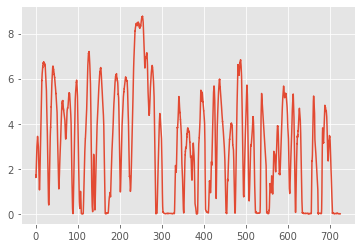

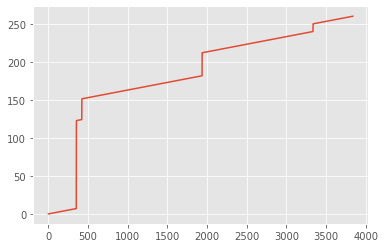

In [84]:
plt.plot(ins_data_2.index,ins_data_2['.mag_speed'])

plt.figure()
plt.plot(ins_when_zeroV.index)


In [92]:
import math
def convert_lat_lon_utm(lat,lon,at):
    a = 6378137.0000
    b = 6356752.3142
    R = math.sqrt(( math.pow( math.pow(a,2) * math.cos(lat*math.pi/180), 2)+ \
                    math.pow( math.pow(b,2) * math.sin(lat*math.pi/180), 2))/ \
                   (math.pow( a * math.cos(lat*math.pi/180), 2)+ \
                    math.pow( b * math.sin(lat*math.pi/180), 2))) + at
    
    return [math.radians(lat)*R,math.radians(lon)*R]




ins_when_zeroV = ins_data_2[ins_data_2['.mag_speed'] < 0.25].copy()

# Code accelerations by stop
ins_when_zeroV['group'] = None
ins_when_zeroV['Easting','Northing'] = None
c_time = ins_when_zeroV.index[0]
group = 0
i = 0
for t in ins_when_zeroV.index:
    if t - c_time > 1: # Seperation time in seconds. Tune according to dataset
        group += 1
        
    ins_when_zeroV.at[t,'group'] = group
    e_n = convert_lat_lon_utm(ins_when_zeroV.iloc[i]['.LLA.x'],ins_when_zeroV.iloc[i]['.LLA.y'],ins_when_zeroV.iloc[i]['.LLA.z'])
    ins_when_zeroV.at[t,'Easting'] = e_n[0]
    ins_when_zeroV.at[t,'Northing'] = e_n[1]
    #print(e_n)
    i+=1
    c_time = t
for i in range(ins_when_zeroV['group'].max()):
    i +=1 # range gives 0 to n, need 1 to n
    seq = ins_when_zeroV[ins_when_zeroV['group']==i].index
    
    print("Stop Group # ",i," Start Seq: ",seq.min(), " End Seq: ",seq.max())


Stop Group #  1  Start Seq:  104.775327  End Seq:  104.83537500000001
Stop Group #  2  Start Seq:  107.89481  End Seq:  113.433981
Stop Group #  3  Start Seq:  134.69075  End Seq:  135.77120000000002
Stop Group #  4  Start Seq:  140.270197  End Seq:  141.009759
Stop Group #  5  Start Seq:  164.84744400000002  End Seq:  173.246698
Stop Group #  6  Start Seq:  285.60010500000004  End Seq:  288.999774
Stop Group #  7  Start Seq:  302.279674  End Seq:  330.498674
Stop Group #  8  Start Seq:  351.15789800000005  End Seq:  352.778301
Stop Group #  9  Start Seq:  380.89763000000005  End Seq:  385.516763
Stop Group #  10  Start Seq:  403.976944  End Seq:  411.53706500000004
Stop Group #  11  Start Seq:  452.636794  End Seq:  455.01682800000003
Stop Group #  12  Start Seq:  473.65575500000006  End Seq:  475.07610000000005
Stop Group #  13  Start Seq:  522.654498  End Seq:  534.255299
Stop Group #  14  Start Seq:  549.614591  End Seq:  556.03422
Stop Group #  15  Start Seq:  617.7339010000001  E

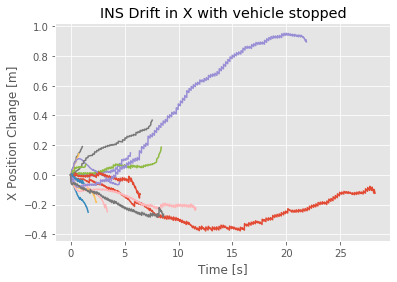

In [98]:
for i in range (group):
    data = ins_when_zeroV[ins_when_zeroV['group'] == i]
    plt.plot(data.index - data.index[0], data['Easting'] - data.iloc[0]['Easting'],label=i)
    plt.xlabel('Time [s]')
    plt.ylabel('X Position Change [m]')
    plt.title('INS Drift in X with vehicle stopped')

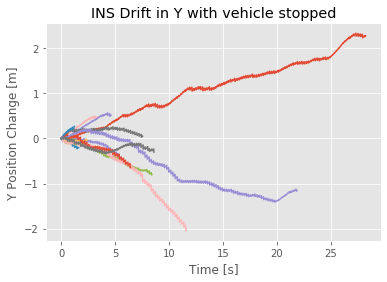

In [96]:
for i in range (group):
    data = ins_when_zeroV[ins_when_zeroV['group'] == i]
    plt.plot(data.index - data.index[0], data['Northing'] - data.iloc[0]['Northing'],label=i)
    plt.xlabel('Time [s]')
    plt.ylabel('Y Position Change [m]')
    plt.title('INS Drift in Y with vehicle stopped')

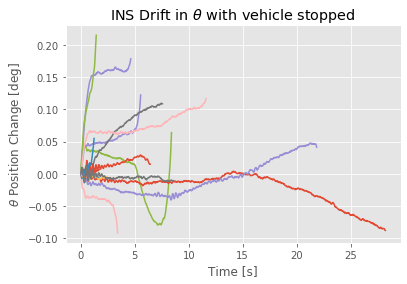

In [99]:
for i in range (group):
    data = ins_when_zeroV[ins_when_zeroV['group'] == i]
    plt.plot(data.index - data.index[0], data['.RPY.z'] - data.iloc[0]['.RPY.z'],label=i)
    plt.xlabel('Time [s]')
    plt.ylabel('$\\theta$ Position Change [deg]')
    plt.title('INS Drift in $\\theta$ with vehicle stopped')